# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Importing data

In [2]:
df=pd.read_csv(r'C:\Users\91882\Downloads\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Getting information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Shape of data

In [5]:
df.shape

(1338, 7)

# Cheking for duplicated values

In [6]:
df.duplicated().any()

True

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().any()

False

In [9]:
df.shape

(1337, 7)

There is 1 duplicated value

# Cheking for Null values

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Handling categorical data

# 1.handling sex column

In [11]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [12]:
df['sex'].replace({"male":1,"female":0},inplace=True)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [14]:
df.shape

(1337, 7)

# 2.handling smoker column

In [15]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [16]:
df['smoker'].replace({"no":0,"yes":1},inplace=True)

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


# 3.handling region column

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [19]:
df['region'].replace({'southeast':0,'southwest':1,'northwest':2,'northeast':3},inplace=True)

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


# Spliting input columns and target column

In [21]:
X=df.iloc[:,:-1]

In [22]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


In [23]:
y=df.iloc[:,-1]

In [24]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Corelation of data

<AxesSubplot:>

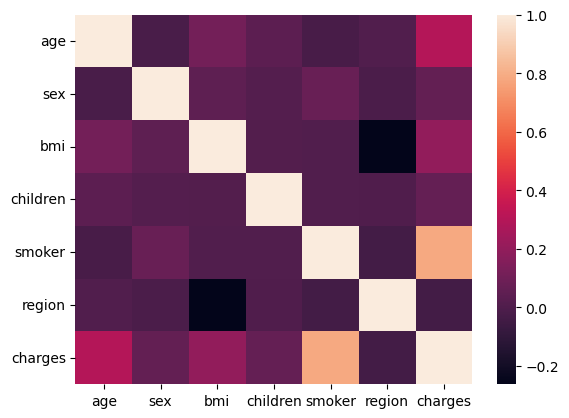

In [25]:
sns.heatmap(df.corr())

# Split into train and test data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Training the model

# 1.Linear regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm=LinearRegression()

In [30]:
lm.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred1=lm.predict(x_test)

In [32]:
from sklearn.metrics import r2_score,accuracy_score

In [33]:
r2_score(y_test,y_pred1)

0.7962585193217645

# 2.RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf=RandomForestRegressor()

In [36]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
y_pred2=rf.predict(x_test)

In [38]:
r2_score(y_test,y_pred2)

0.867645067049098

# Predicting with new values

In [44]:
data_n=pd.DataFrame({'age':40,'sex':1,'bmi':40.30,'children':4,'smoker':1,'region':2},index=[0])

In [45]:
data_n

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [46]:
print(gr.predict(data_n))

[43343.0878897]


# Train our model with entire data set

In [47]:
ran=RandomForestRegressor()

In [48]:
ran.fit(X,y)

GradientBoostingRegressor()

In [49]:
print(ran.predict(data_n))

[42844.58257524]


# Saving our model

In [50]:
import pickle as pk

In [51]:
file=open('insurance.pkl','wb')

In [52]:
pk.dump(ran,file)

In [53]:
model=pk.load(open('insurance.pkl','rb'))

In [54]:
model.predict(data_n)

array([42844.58257524])